<a href="https://colab.research.google.com/github/StabaSat/StabaPort/blob/main/Staba_project3_ml_7thfeb_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 3 - Walmart Sales Forecast

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

![](https://i.imgur.com/3mnIPtK.jpg)


#Project 3 - Walmart Sales Forecast

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

![](https://i.imgur.com/3mnIPtK.jpg)


## Project Outline
Here's an outline of how we will approach this project.
1. Download the dataset
2. Explore and analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Perform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online.

Let's begin by installing the required libraries.

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
!pip install  plotly.express --quiet

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.

In [ ]:
!pip install opendatasets 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

You'll be asked to provide your Kaggle credentials to download the data. Follow these instructions: http://bit.ly/kaggle-creds

In [ ]:
od.download('https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/datax')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: stabasatapathy
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 140MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


Let's load the data into Pandas dataframes.

In [ ]:
os.listdir('walmart-recruiting-store-sales-forecasting')

['train.csv.zip',
 'test.csv.zip',
 'sampleSubmission.csv.zip',
 'features.csv.zip',
 'stores.csv']

In [ ]:
!pip install scikit-learn --upgrade 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
raw_df = pd.read_csv('walmart-recruiting-store-sales-forecasting/features.csv.zip')

In [ ]:
train_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv.zip')
store_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv.zip')
feature_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv.zip')
Submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [ ]:
smaple_df = train_df.sample(n = 50000)
smaple_df.head(10)

Store  Dept        Date  Weekly_Sales  IsHoliday
250688     26    28  2011-11-25        424.31       True
240257     25    25  2010-05-07       9203.40      False
348941     37    20  2012-08-17         32.00      False
225700     23    90  2010-12-03      25050.38      False
112179     12    32  2010-06-04       8123.58      False
201533     21    30  2010-06-18       5031.55      False
164367     17    59  2010-08-27        708.64      False
369898     39    91  2012-07-20      66569.23      False
174103     18    58  2010-04-23       4753.00      False
148028     16     1  2010-03-26      13304.21      False

In [ ]:
sample_test_df=test_df.sample(n = 50000)
sample_test_df.head(10)

Store  Dept        Date  IsHoliday
100581     39    83  2013-05-31      False
16968       7    25  2013-02-15      False
38742      15    31  2013-04-12      False
80619      31    17  2013-02-01      False
90616      35    16  2013-03-08      False
25907      10    60  2013-05-03      False
68573      26    35  2013-04-05      False
66399      25    56  2013-03-15      False
47150      18    45  2013-02-22      False
22851       9    38  2013-07-12      False

In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
store_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
feature_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

### Impute missing numerical data

In [ ]:
feature_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
feature_df.drop(columns=[ 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5',],inplace=True)

In [ ]:
feature_df.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64


### Date

First, let's convert `Date` to a `datetime` column and extract different parts of the date.

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
train_sample_df = smaple_df.merge(store_df, how='left').merge(feature_df, how='left')
test_store_df = sample_test_df.merge(store_df, how='left').merge(feature_df, how='left')

In [ ]:
split_date(train_sample_df)
split_date(test_store_df)

Let's merge the information from `store_df` into `train_df` and `test_df`.

In [ ]:
train_sample_df

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0         26    28 2011-11-25        424.31       True    A  152513   
1         25    25 2010-05-07       9203.40      False    B  128107   
2         37    20 2012-08-17         32.00      False    C   39910   
3         23    90 2010-12-03      25050.38      False    B  114533   
4         12    32 2010-06-04       8123.58      False    B  112238   
...      ...   ...        ...           ...        ...  ...     ...   
49995     31    80 2011-12-09      20809.22      False    A  203750   
49996     19    42 2011-08-19       7105.47      False    A  203819   
49997     12    80 2010-12-24         36.84      False    B  112238   
49998     21     6 2010-02-19       7531.63      False    B  140167   
49999     22    12 2012-10-12       3615.00      False    B  119557   

       Temperature  Fuel_Price         CPI  Unemployment  Year  Month  Day  \
0            31.07       3.536  136.478800         7.598  2011     11   25   
1            63.67       2.966  203.610178         7.856  2010      5    7   
2            85.89       3.571  220.719961         6.623  2012      8   17   
3            34.30       3.065  132.756667         5.287  2010     12    3   
4            81.39       2.941  126.136065        14.099  2010      6    4   
...            ...         ...         ...           ...   ...    ...  ...   
49995        41.44       3.158  218.605037         7.441  2011     12    9   
49996        71.14       3.942  136.183129         7.806  2011      8   19   
49997        52.02       3.236  126.983581        14.313  2010     12   24   
49998        39.75       2.514  210.945160         8.324  2010      2   19   
49999        54.18       4.029  142.937617         7.543  2012     10   12   

       WeekOfYear  
0              47  
1              18  
2              33  
3              48  
4              22  
...           ...  
49995          49  
49996          33  
49997          51  
49998           7  
49999          41  

[50000 rows x 15 columns]

In [ ]:
test_store_df

Store  Dept       Date  IsHoliday Type    Size  Temperature  \
0         39    83 2013-05-31      False    A  184109        80.74   
1          7    25 2013-02-15      False    B   70713        13.73   
2         15    31 2013-04-12      False    B  123737        42.94   
3         31    17 2013-02-01      False    A  203750        55.38   
4         35    16 2013-03-08      False    B  103681        36.11   
...      ...   ...        ...        ...  ...     ...          ...   
49995     39    74 2013-03-15      False    A  184109        59.54   
49996      5     2 2012-12-21      False    B   34875        58.63   
49997     25    95 2013-02-22      False    B  128107        23.16   
49998     26     8 2013-06-21      False    A  152513        56.02   
49999     23    23 2013-02-08       True    B  114533        14.94   

       Fuel_Price         CPI  Unemployment  Year  Month  Day  WeekOfYear  
0           3.466         NaN           NaN  2013      5   31          22  
1           3.391  201.040053         7.107  2013      2   15           7  
2           3.914  139.122613         7.806  2013      4   12          15  
3           3.244  223.869197         6.237  2013      2    1           5  
4           3.860  142.949269         8.600  2013      3    8          10  
...           ...         ...           ...   ...    ...  ...         ...  
49995       3.622  223.507231         6.266  2013      3   15          11  
49996       3.098  224.435138         5.422  2012     12   21          51  
49997       3.859  217.037330         7.439  2013      2   22           8  
49998       3.673         NaN           NaN  2013      6   21          25  
49999       3.755  138.859839         3.932  2013      2    8           6  

[50000 rows x 14 columns]

Let's save our work before continuing.

## Exploratory Data Analysis

In [ ]:
train_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         50000 non-null  int64         
 1   Dept          50000 non-null  int64         
 2   Date          50000 non-null  datetime64[ns]
 3   Weekly_Sales  50000 non-null  float64       
 4   IsHoliday     50000 non-null  bool          
 5   Type          50000 non-null  object        
 6   Size          50000 non-null  int64         
 7   Temperature   50000 non-null  float64       
 8   Fuel_Price    50000 non-null  float64       
 9   CPI           50000 non-null  float64       
 10  Unemployment  50000 non-null  float64       
 11  Year          50000 non-null  int64         
 12  Month         50000 non-null  int64         
 13  Day           50000 non-null  int64         
 14  WeekOfYear    50000 non-null  UInt32        
dtypes: UInt32(1), bool(1), datetime64[ns

In [ ]:
test_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         50000 non-null  int64         
 1   Dept          50000 non-null  int64         
 2   Date          50000 non-null  datetime64[ns]
 3   IsHoliday     50000 non-null  bool          
 4   Type          50000 non-null  object        
 5   Size          50000 non-null  int64         
 6   Temperature   50000 non-null  float64       
 7   Fuel_Price    50000 non-null  float64       
 8   CPI           33423 non-null  float64       
 9   Unemployment  33423 non-null  float64       
 10  Year          50000 non-null  int64         
 11  Month         50000 non-null  int64         
 12  Day           50000 non-null  int64         
 13  WeekOfYear    50000 non-null  UInt32        
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(4), int64(6), object(1)
memory usage

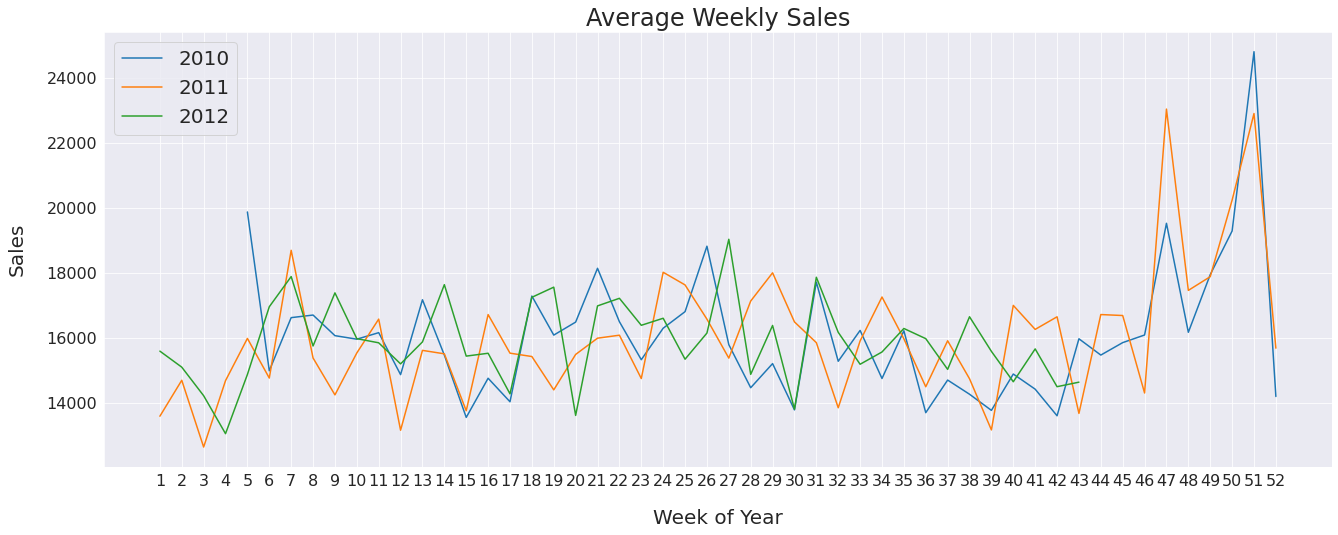

In [ ]:
weekly_sales_2010 = train_sample_df[train_sample_df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = train_sample_df[train_sample_df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = train_sample_df[train_sample_df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);


Store Types

In [ ]:
typecounts = train_sample_df.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Average weekly sales

In [ ]:
avgweeklysales = train_sample_df.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Avergae Sales",
             color_discrete_sequence=["#FFA15A"])
fig.show()

Average Store Sales

In [ ]:
store_sales = train_sample_df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(store_sales, 
             x=store_sales.index, 
             y=store_sales.values,  
             title="Average Store Sales",
             labels={'x':'Stores', 'y':'Sales'},
             color_discrete_sequence=["#E377C2"])

fig.update_xaxes(tick0=1, dtick=1)

fig.show()

Rel: Temp VS Sales

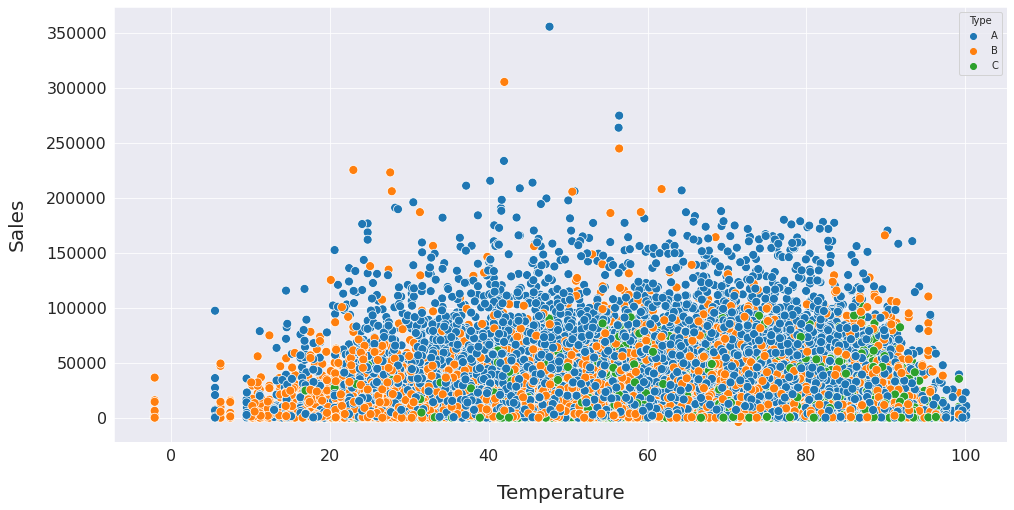

In [ ]:

plt.figure(figsize=(16,8))
sns.scatterplot(x=train_sample_df.Temperature, y=train_sample_df.Weekly_Sales, hue=train_sample_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);


There seems to be no relationship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

Rel: Fuel_price Vs Sales

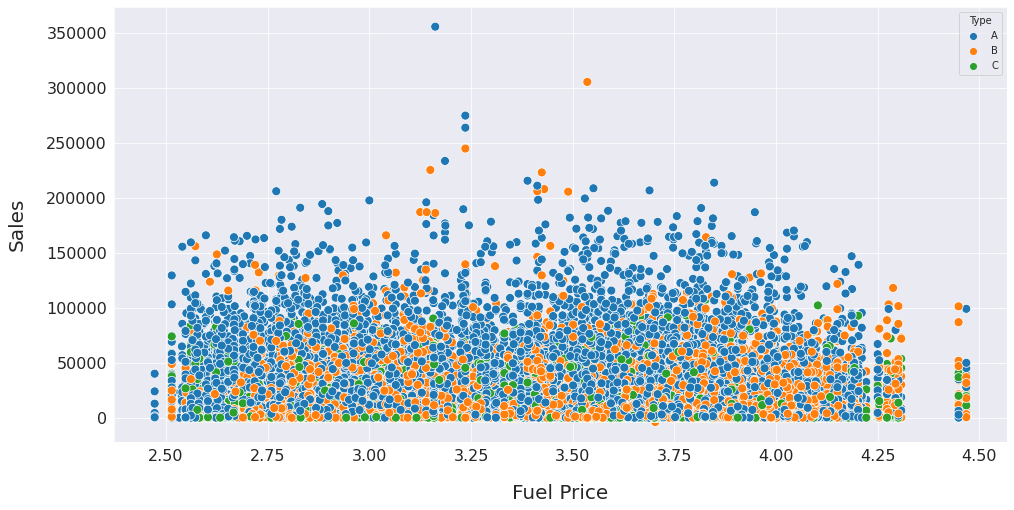

In [ ]:

plt.figure(figsize=(16,8))
sns.scatterplot(x=train_sample_df.Fuel_Price, y=train_sample_df.Weekly_Sales, hue=train_sample_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Between fuel price and the sales there doesn't seem to exist any clear relationship



Rel: CPI Vs Sales

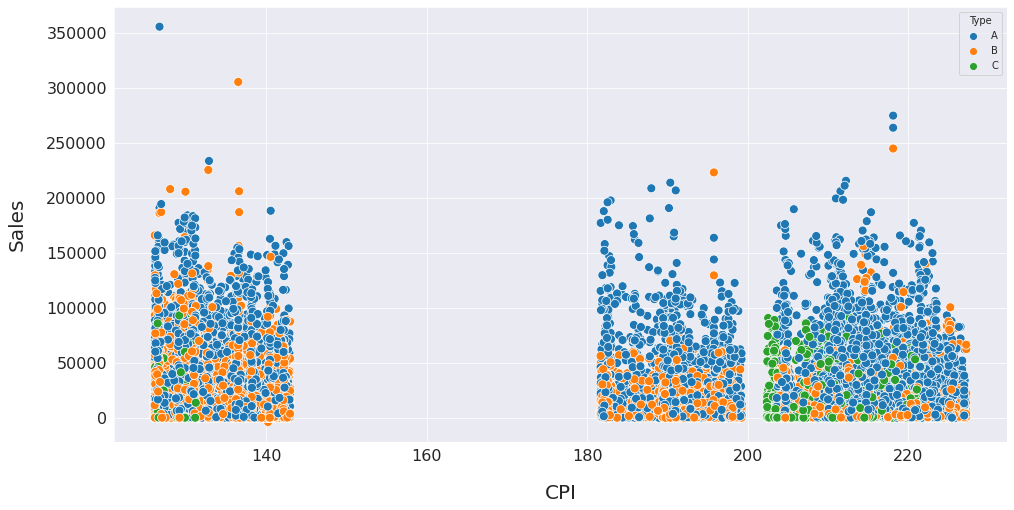

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_sample_df.CPI, y=train_sample_df.Weekly_Sales, hue=train_sample_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

There are 3 clear clusters but there doesn't exist any clear correlation between CPI and weekly sales



**Coorelation Matrix **

Lets study the relationship between the different columns numerically to check how they correlate with the weekly sales in order to confirm the inferences we have gathered from the above EDA study. Since the correlation value can only be calculated for the numerical columns, so we will first convert the 'Type' column to numerical values. Type 'A', 'B' and 'C' will be mapped to 1, 2 and 3 respectively


In [ ]:
storetype_values = {'A':3, 'B':2, 'C':1}
train_sample_df['Type_Numeric'] = train_sample_df.Type.map(storetype_values)
train_sample_df['Type_Numeric'] = train_sample_df.Type.map(storetype_values)

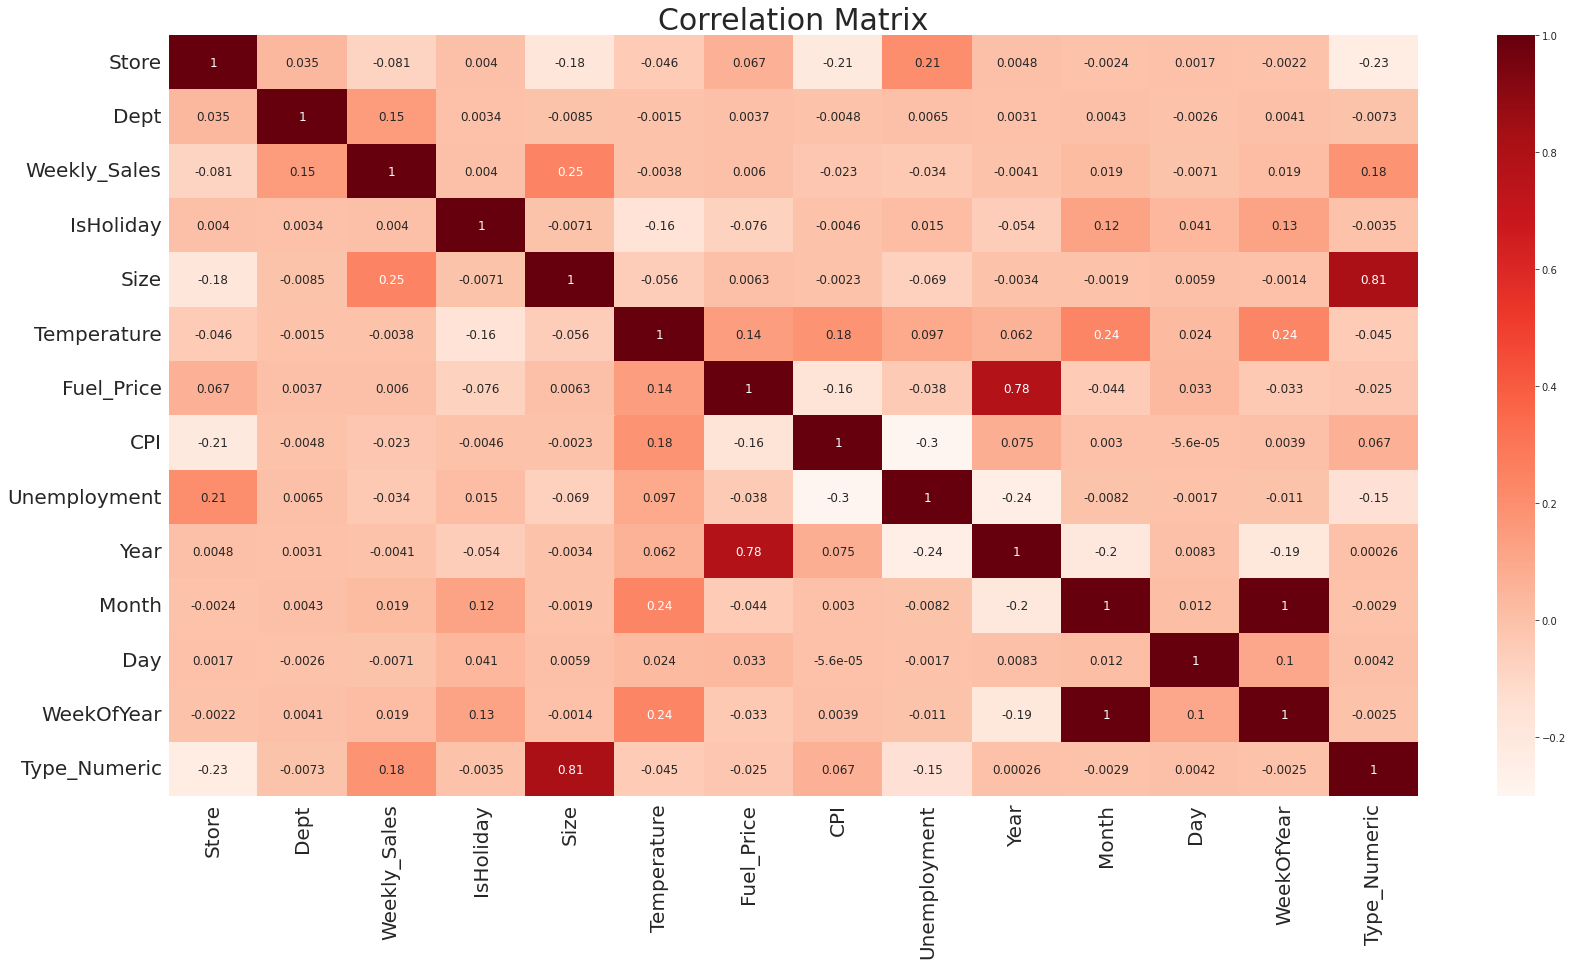

In [ ]:

plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(train_sample_df.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

- Department, Store size and Type have moderate correlation with the weekly sales

- IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks1. 

- We will also leave out Month and Day as this information is already contained in the WeekOfYear

### Input and Target Columns


In [ ]:
train_sample_df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month',
       'Day', 'WeekOfYear'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
target_col = 'Weekly_Sales'

In [ ]:
inputs = train_sample_df[input_cols].copy()
targets = train_sample_df[target_col].copy()

In [ ]:
test_inputs = test_store_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [ ]:
numeric_cols = ['Store', 'Dept', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
categorical_cols = ['IsHoliday', 'Type']

In [ ]:
inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

In [ ]:
test_inputs[numeric_cols].isna().sum()

Store               0
Dept                0
Size                0
Temperature         0
Fuel_Price          0
CPI             16577
Unemployment    16577
Year                0
Month               0
Day                 0
WeekOfYear          0
dtype: int64

In [ ]:
mean_CPI = inputs.CPI.mean()
mean_Unemployment = inputs.Unemployment.mean()

In [ ]:
inputs['CPI'].fillna(mean_CPI, inplace=True)
inputs['Unemployment'].fillna(mean_Unemployment, inplace=True)
test_inputs['CPI'].fillna(mean_CPI, inplace=True)
test_inputs['Unemployment'].fillna(mean_Unemployment, inplace=True)

In [ ]:
test_inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

In [ ]:
inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

###Scaling Numeric Features


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(test_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols1 = list(encoder1.get_feature_names_out(categorical_cols))

In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols1] = encoder1.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.



In [ ]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols1]


## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)



**Training**

To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using model.fit.



In [ ]:
%%time
model.fit(X, targets)

[12:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.45 s, sys: 47.5 ms, total: 1.5 s
Wall time: 1.06 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

**Prediction**
We can now make predictions and evaluate the model using model.predict.

In [ ]:
preds = model.predict(X)


####Prediction
Let's predict the submission set directly.

In [ ]:
preds1 = model.predict(X_test)


Evaluation

Let's evaluate the predictions using RMSE error.

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(preds, targets)


14314.238155461648

Visualization

We can visualize individual trees using plot_tree (note: this requires the graphviz library to be installed).

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

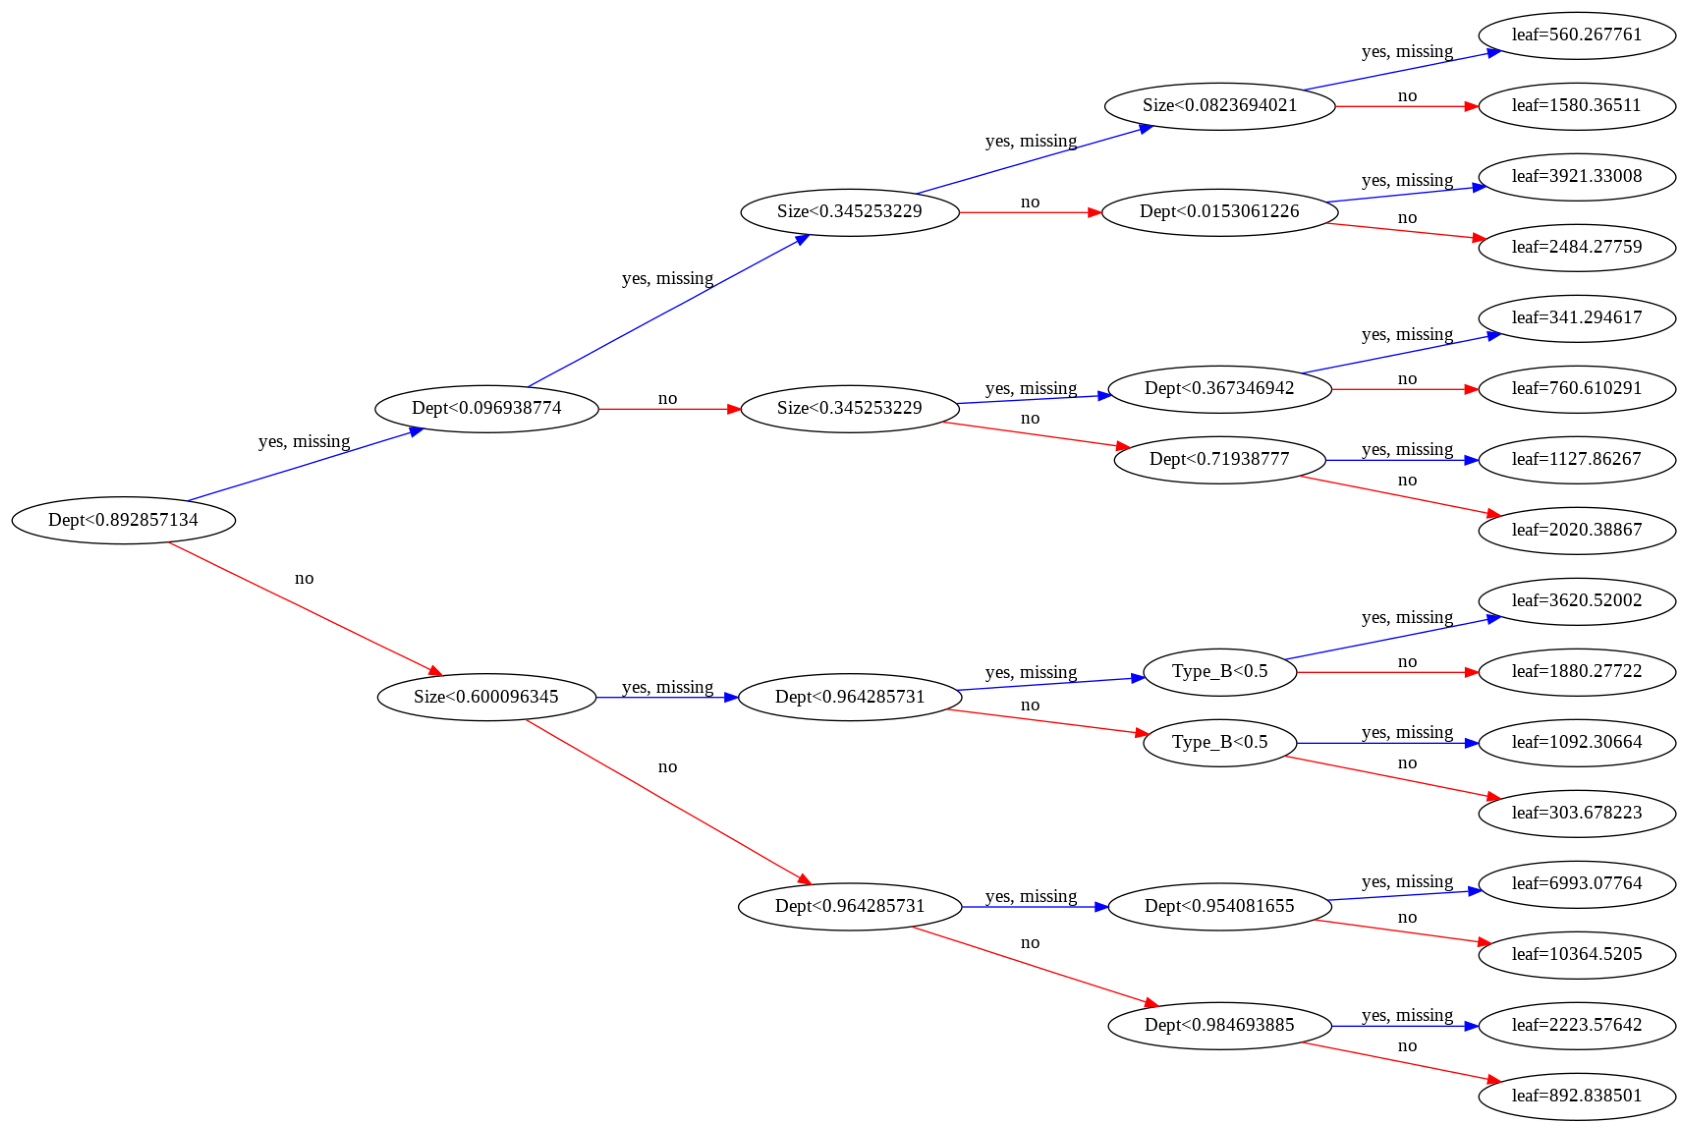

In [ ]:
plot_tree(model, rankdir='LR');

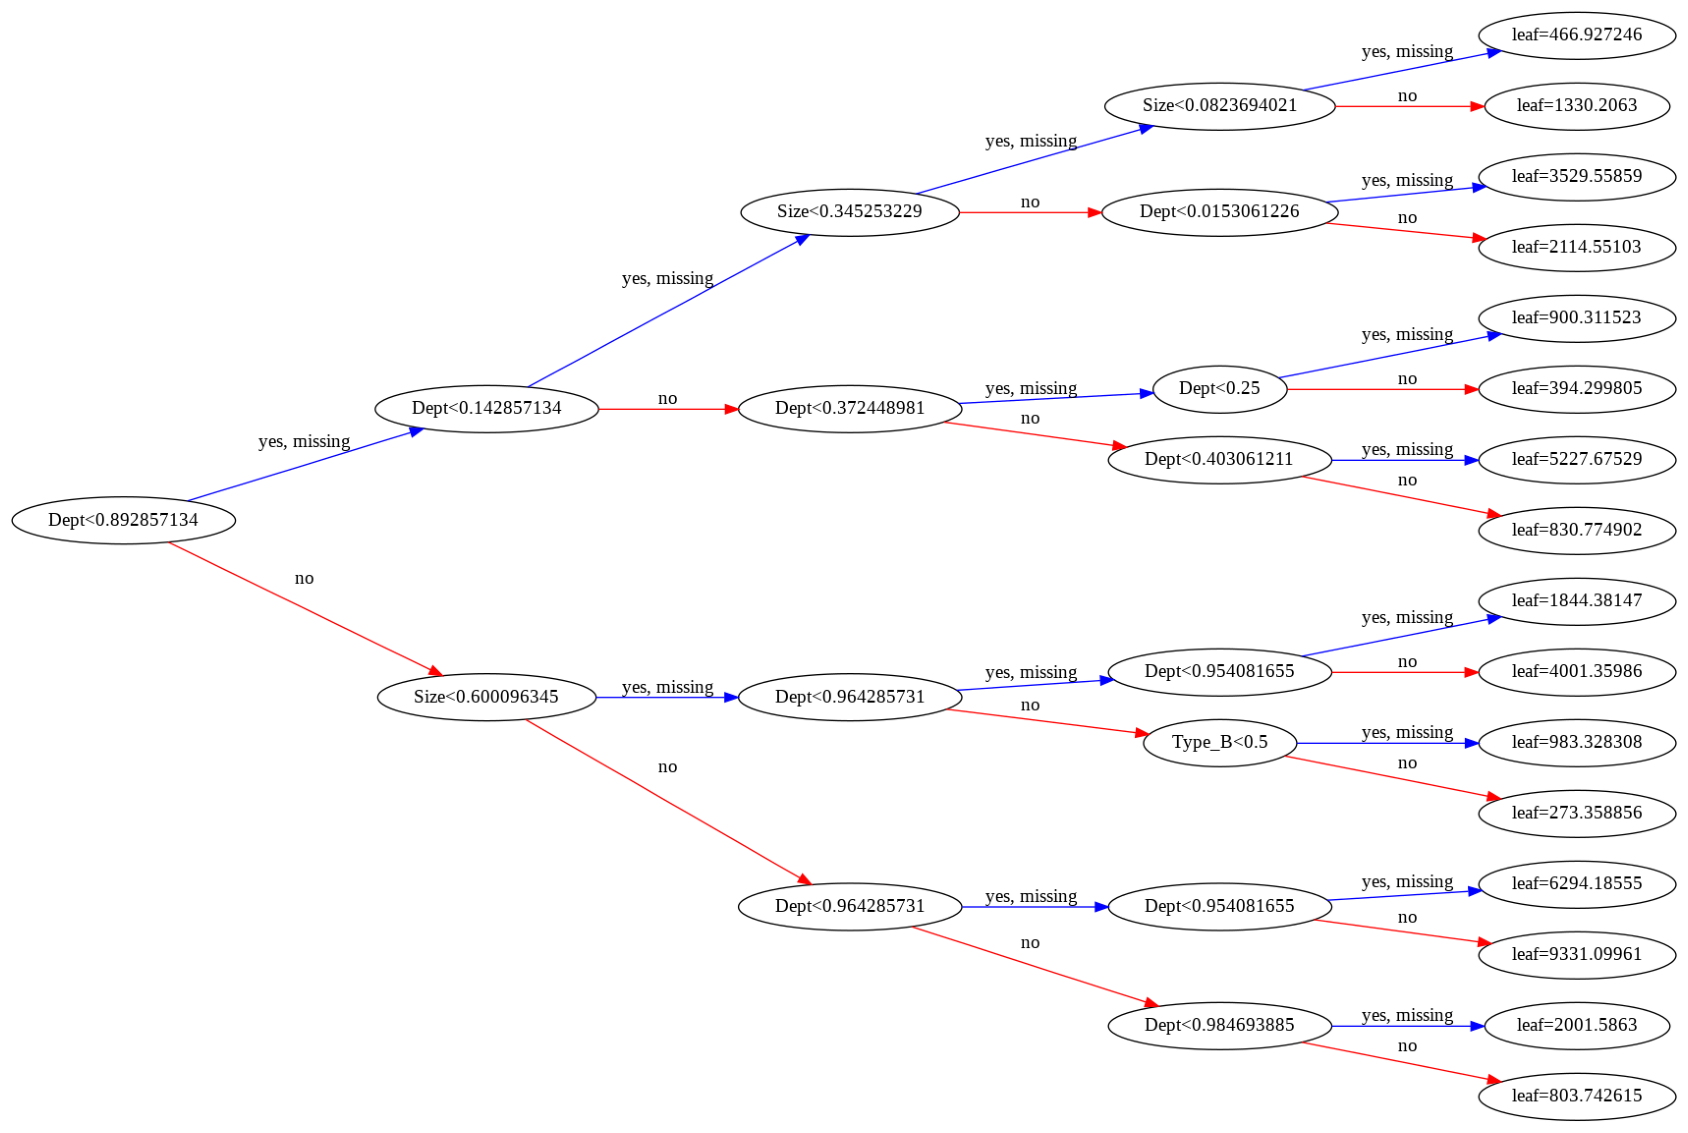

In [ ]:
plot_tree(model, rankdir='LR', num_trees=1);


In [ ]:
trees = model.get_booster().get_dump()

In [ ]:
len(trees)

20

In [ ]:
print(trees[0])

0:[Dept<0.892857134] yes=1,no=2,missing=1
	1:[Dept<0.096938774] yes=3,no=4,missing=3
		3:[Size<0.345253229] yes=7,no=8,missing=7
			7:[Size<0.0823694021] yes=15,no=16,missing=15
				15:leaf=560.267761
				16:leaf=1580.36511
			8:[Dept<0.0153061226] yes=17,no=18,missing=17
				17:leaf=3921.33008
				18:leaf=2484.27759
		4:[Size<0.345253229] yes=9,no=10,missing=9
			9:[Dept<0.367346942] yes=19,no=20,missing=19
				19:leaf=341.294617
				20:leaf=760.610291
			10:[Dept<0.71938777] yes=21,no=22,missing=21
				21:leaf=1127.86267
				22:leaf=2020.38867
	2:[Size<0.600096345] yes=5,no=6,missing=5
		5:[Dept<0.964285731] yes=11,no=12,missing=11
			11:[Type_B<0.5] yes=23,no=24,missing=23
				23:leaf=3620.52002
				24:leaf=1880.27722
			12:[Type_B<0.5] yes=25,no=26,missing=25
				25:leaf=1092.30664
				26:leaf=303.678223
		6:[Dept<0.964285731] yes=13,no=14,missing=13
			13:[Dept<0.954081655] yes=27,no=28,missing=27
				27:leaf=6993.07764
				28:leaf=10364.5205
			14:[Dept<0.984693885] yes=29,no=30,

**Feature importance**

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

feature  importance
2           Size    0.353708
1           Dept    0.298798
5            CPI    0.088997
0          Store    0.070894
15        Type_C    0.068783
14        Type_B    0.061382
6   Unemployment    0.040792
10    WeekOfYear    0.013520
13        Type_A    0.003126
3    Temperature    0.000000

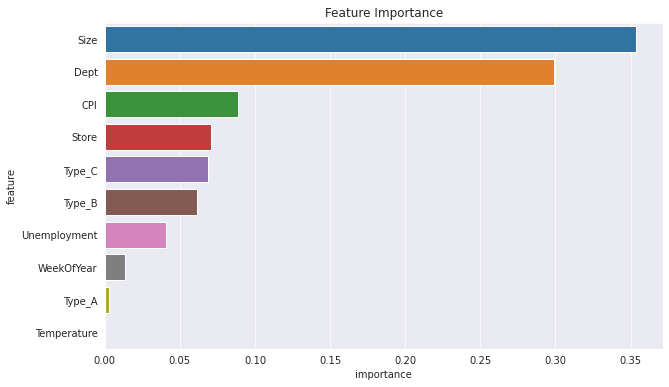

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

In [ ]:
from sklearn.model_selection import KFold


Scikit-learn provides utilities for performing K fold cross validation.

Let's define a helper function train_and_evaluate which trains a model the given parameters and returns the trained model, training error and validation error.

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

Now, we can use the KFold utility to create the different training/validations splits and train a separate model for each fold.

In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[13:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14316.611602047056, Validation RMSE: 15488.203242689005
[13:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14578.532538989868, Validation RMSE: 14212.019671703578
[13:02:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14084.4558030465, Validation RMSE: 14180.319655539464
[13:02:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14363.056463586177, Validation RMSE: 13976.038710040993
[13:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14370.125047141237, Validation RMSE: 14107.915919321973


Let's also define a function to average predictions from the 5 different models.

In [ ]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds = predict_avg(models, X)

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Check out the following resources to learn more about hyperparameter supported by XGBoost:

- https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
- https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
model

XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

Here's a helper function to test hyperparameters with K-fold cross validation.



### Evaluation

Let's evaluate the predictions using RMSE error.

In [ ]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [ ]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


**n_estimators**

The number of trees to be created. More trees = greater capacity of the model.

In [ ]:
test_params(n_estimators=10)

[13:04:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 18729.561210463347, Validation RMSE: 17651.454239601884


In [ ]:
test_params(n_estimators=100)

[13:05:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 11284.484176163154, Validation RMSE: 10892.46461784228


In [ ]:
test_params(n_estimators=500)

[13:05:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8315.396099440924, Validation RMSE: 8400.863708436804


**Max_depth**

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
test_params(max_depth=2)

[13:05:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14115.27013928919, Validation RMSE: 13441.825469660078


In [ ]:
test_params(max_depth=15)

[13:05:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 383.6607740908724, Validation RMSE: 4511.425491466526


**Learning_rate**

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [ ]:
test_params(n_estimators=50, learning_rate=0.01)

[13:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 21952.583914784896, Validation RMSE: 20744.37632960785


In [ ]:
test_params(n_estimators=500, learning_rate=0.9)

[13:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 6062.461244370253, Validation RMSE: 7049.595015763659


In [ ]:
test_params(n_estimators=500, learning_rate=0.9, max_depth=15)

[13:06:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.0011892387843694219, Validation RMSE: 5852.6934997826565


**Booster**

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using booster.

In [ ]:
test_params(booster='gblinear')

[13:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 22329.703022112473, Validation RMSE: 21028.45247967734


####Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters.

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [ ]:
%%time
model.fit(X, targets)

[13:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 47s, sys: 305 ms, total: 2min 48s
Wall time: 1min 37s


XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=0.9)

Now that the model is trained, we can make predictions on the test set.



In [ ]:
test_preds = model.predict(X_test)


In [ ]:
rmse(test_preds, targets)

31438.740067013467

In [ ]:
rmse(preds, targets)

14323.96405267828

We tested final regult with XGBRegressor without any useful parameters and with parameters

Creating Submitting file

In [ ]:
Submission

Id  Weekly_Sales
0         1_1_2012-11-02             0
1         1_1_2012-11-09             0
2         1_1_2012-11-16             0
3         1_1_2012-11-23             0
4         1_1_2012-11-30             0
...                  ...           ...
115059  45_98_2013-06-28             0
115060  45_98_2013-07-05             0
115061  45_98_2013-07-12             0
115062  45_98_2013-07-19             0
115063  45_98_2013-07-26             0

[115064 rows x 2 columns]

In [ ]:
Submission_sample=Submission.sample(n = 50000)
Submission_sample.shape

(50000, 2)

In [ ]:
test_preds.shape

(50000,)

In [ ]:
Submission_sample['Weekly_Sales'] = test_preds
Submission_sample.to_csv('Submission_sample.csv',index=False)

In [ ]:
Submission_sample

Id  Weekly_Sales
20711   8_67_2013-03-08   3482.741943
79126  30_46_2013-07-05   5186.777832
71542  27_44_2012-12-28     -7.904823
4108    2_36_2012-11-23  12696.546875
20587   8_58_2012-12-28   6837.250977
...                 ...           ...
42585  16_87_2013-06-21  23111.355469
16496   7_11_2013-02-15  20894.996094
96614   38_7_2013-05-10  41409.351562
6043    3_12_2013-06-28  27820.746094
61265  23_80_2013-05-24  44606.605469

[50000 rows x 2 columns]

## Summary and References



## Project Outline
Here's an outline of how we will approach this project.
1. Download the dataset
2. Explore and analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Perform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Train on a GPU with the entire dataset
10. Document & publish the project online.

Let's begin by installing the required libraries.

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import xgboost


from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
!pip install  plotly.express --quiet

## Downloading the Data

We can download the dataset from Kaggle directly within the Jupyter notebook using the `opendatasets` library. Make sure to [accept the competition rules](https://www.kaggle.com/c/rossmann-store-sales/rules) before executing the following cell.

In [ ]:
!pip install opendatasets 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

You'll be asked to provide your Kaggle credentials to download the data. Follow these instructions: http://bit.ly/kaggle-creds

In [ ]:
od.download('https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/datax')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: stabasatapathy
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 140MB/s]


Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


Let's load the data into Pandas dataframes.

In [ ]:
os.listdir('walmart-recruiting-store-sales-forecasting')

['train.csv.zip',
 'test.csv.zip',
 'sampleSubmission.csv.zip',
 'features.csv.zip',
 'stores.csv']

In [ ]:
!pip install scikit-learn --upgrade 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
raw_df = pd.read_csv('walmart-recruiting-store-sales-forecasting/features.csv.zip')

In [ ]:
train_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/train.csv.zip')
store_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/stores.csv')
test_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/test.csv.zip')
feature_df = pd.read_csv('./walmart-recruiting-store-sales-forecasting/features.csv.zip')
Submission = pd.read_csv('./walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [ ]:
smaple_df = train_df.sample(n = 50000)
smaple_df.head(10)

Store  Dept        Date  Weekly_Sales  IsHoliday
250688     26    28  2011-11-25        424.31       True
240257     25    25  2010-05-07       9203.40      False
348941     37    20  2012-08-17         32.00      False
225700     23    90  2010-12-03      25050.38      False
112179     12    32  2010-06-04       8123.58      False
201533     21    30  2010-06-18       5031.55      False
164367     17    59  2010-08-27        708.64      False
369898     39    91  2012-07-20      66569.23      False
174103     18    58  2010-04-23       4753.00      False
148028     16     1  2010-03-26      13304.21      False

In [ ]:
sample_test_df=test_df.sample(n = 50000)
sample_test_df.head(10)

Store  Dept        Date  IsHoliday
100581     39    83  2013-05-31      False
16968       7    25  2013-02-15      False
38742      15    31  2013-04-12      False
80619      31    17  2013-02-01      False
90616      35    16  2013-03-08      False
25907      10    60  2013-05-03      False
68573      26    35  2013-04-05      False
66399      25    56  2013-03-15      False
47150      18    45  2013-02-22      False
22851       9    38  2013-07-12      False

In [ ]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
store_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [ ]:
feature_df.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [ ]:
test_df.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

### Impute missing numerical data

In [ ]:
feature_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
feature_df.drop(columns=[ 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5',],inplace=True)

In [ ]:
feature_df.isnull().sum()

Store             0
Date              0
Temperature       0
Fuel_Price        0
CPI             585
Unemployment    585
IsHoliday         0
dtype: int64


### Date

First, let's convert `Date` to a `datetime` column and extract different parts of the date.

In [ ]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
train_sample_df = smaple_df.merge(store_df, how='left').merge(feature_df, how='left')
test_store_df = sample_test_df.merge(store_df, how='left').merge(feature_df, how='left')

In [ ]:
split_date(train_sample_df)
split_date(test_store_df)

Let's merge the information from `store_df` into `train_df` and `test_df`.

In [ ]:
train_sample_df

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0         26    28 2011-11-25        424.31       True    A  152513   
1         25    25 2010-05-07       9203.40      False    B  128107   
2         37    20 2012-08-17         32.00      False    C   39910   
3         23    90 2010-12-03      25050.38      False    B  114533   
4         12    32 2010-06-04       8123.58      False    B  112238   
...      ...   ...        ...           ...        ...  ...     ...   
49995     31    80 2011-12-09      20809.22      False    A  203750   
49996     19    42 2011-08-19       7105.47      False    A  203819   
49997     12    80 2010-12-24         36.84      False    B  112238   
49998     21     6 2010-02-19       7531.63      False    B  140167   
49999     22    12 2012-10-12       3615.00      False    B  119557   

       Temperature  Fuel_Price         CPI  Unemployment  Year  Month  Day  \
0            31.07       3.536  136.478800         7.598  2011     11   25   
1            63.67       2.966  203.610178         7.856  2010      5    7   
2            85.89       3.571  220.719961         6.623  2012      8   17   
3            34.30       3.065  132.756667         5.287  2010     12    3   
4            81.39       2.941  126.136065        14.099  2010      6    4   
...            ...         ...         ...           ...   ...    ...  ...   
49995        41.44       3.158  218.605037         7.441  2011     12    9   
49996        71.14       3.942  136.183129         7.806  2011      8   19   
49997        52.02       3.236  126.983581        14.313  2010     12   24   
49998        39.75       2.514  210.945160         8.324  2010      2   19   
49999        54.18       4.029  142.937617         7.543  2012     10   12   

       WeekOfYear  
0              47  
1              18  
2              33  
3              48  
4              22  
...           ...  
49995          49  
49996          33  
49997          51  
49998           7  
49999          41  

[50000 rows x 15 columns]

In [ ]:
test_store_df

Store  Dept       Date  IsHoliday Type    Size  Temperature  \
0         39    83 2013-05-31      False    A  184109        80.74   
1          7    25 2013-02-15      False    B   70713        13.73   
2         15    31 2013-04-12      False    B  123737        42.94   
3         31    17 2013-02-01      False    A  203750        55.38   
4         35    16 2013-03-08      False    B  103681        36.11   
...      ...   ...        ...        ...  ...     ...          ...   
49995     39    74 2013-03-15      False    A  184109        59.54   
49996      5     2 2012-12-21      False    B   34875        58.63   
49997     25    95 2013-02-22      False    B  128107        23.16   
49998     26     8 2013-06-21      False    A  152513        56.02   
49999     23    23 2013-02-08       True    B  114533        14.94   

       Fuel_Price         CPI  Unemployment  Year  Month  Day  WeekOfYear  
0           3.466         NaN           NaN  2013      5   31          22  
1           3.391  201.040053         7.107  2013      2   15           7  
2           3.914  139.122613         7.806  2013      4   12          15  
3           3.244  223.869197         6.237  2013      2    1           5  
4           3.860  142.949269         8.600  2013      3    8          10  
...           ...         ...           ...   ...    ...  ...         ...  
49995       3.622  223.507231         6.266  2013      3   15          11  
49996       3.098  224.435138         5.422  2012     12   21          51  
49997       3.859  217.037330         7.439  2013      2   22           8  
49998       3.673         NaN           NaN  2013      6   21          25  
49999       3.755  138.859839         3.932  2013      2    8           6  

[50000 rows x 14 columns]

Let's save our work before continuing.

## Exploratory Data Analysis

In [ ]:
train_sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         50000 non-null  int64         
 1   Dept          50000 non-null  int64         
 2   Date          50000 non-null  datetime64[ns]
 3   Weekly_Sales  50000 non-null  float64       
 4   IsHoliday     50000 non-null  bool          
 5   Type          50000 non-null  object        
 6   Size          50000 non-null  int64         
 7   Temperature   50000 non-null  float64       
 8   Fuel_Price    50000 non-null  float64       
 9   CPI           50000 non-null  float64       
 10  Unemployment  50000 non-null  float64       
 11  Year          50000 non-null  int64         
 12  Month         50000 non-null  int64         
 13  Day           50000 non-null  int64         
 14  WeekOfYear    50000 non-null  UInt32        
dtypes: UInt32(1), bool(1), datetime64[ns

In [ ]:
test_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         50000 non-null  int64         
 1   Dept          50000 non-null  int64         
 2   Date          50000 non-null  datetime64[ns]
 3   IsHoliday     50000 non-null  bool          
 4   Type          50000 non-null  object        
 5   Size          50000 non-null  int64         
 6   Temperature   50000 non-null  float64       
 7   Fuel_Price    50000 non-null  float64       
 8   CPI           33423 non-null  float64       
 9   Unemployment  33423 non-null  float64       
 10  Year          50000 non-null  int64         
 11  Month         50000 non-null  int64         
 12  Day           50000 non-null  int64         
 13  WeekOfYear    50000 non-null  UInt32        
dtypes: UInt32(1), bool(1), datetime64[ns](1), float64(4), int64(6), object(1)
memory usage

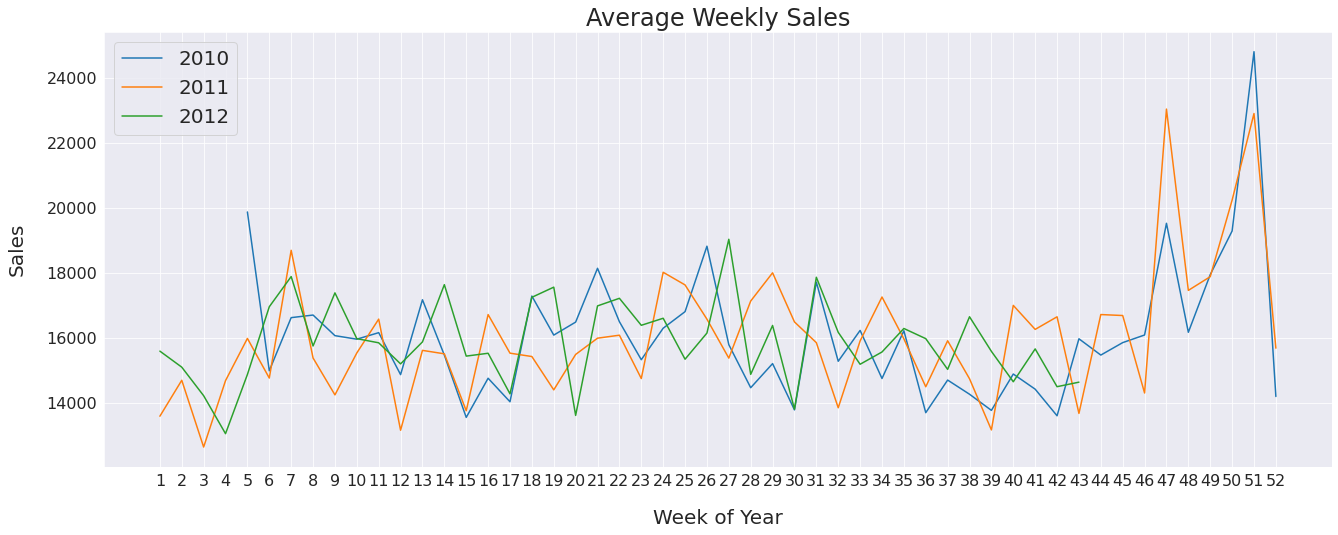

In [ ]:
weekly_sales_2010 = train_sample_df[train_sample_df.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = train_sample_df[train_sample_df.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = train_sample_df[train_sample_df.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()

plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);


Store Types

In [ ]:
typecounts = train_sample_df.Type.value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])

fig = px.pie(df, values='Counts', names='Store_Type',
             title='Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Average weekly sales

In [ ]:
avgweeklysales = train_sample_df.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])

fig = px.bar(df, 
             x="Store_Type", 
             y="AvgSales",  
             title="Avergae Sales",
             color_discrete_sequence=["#FFA15A"])
fig.show()

Average Store Sales

In [ ]:
store_sales = train_sample_df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)


fig = px.bar(store_sales, 
             x=store_sales.index, 
             y=store_sales.values,  
             title="Average Store Sales",
             labels={'x':'Stores', 'y':'Sales'},
             color_discrete_sequence=["#E377C2"])

fig.update_xaxes(tick0=1, dtick=1)

fig.show()

Rel: Temp VS Sales

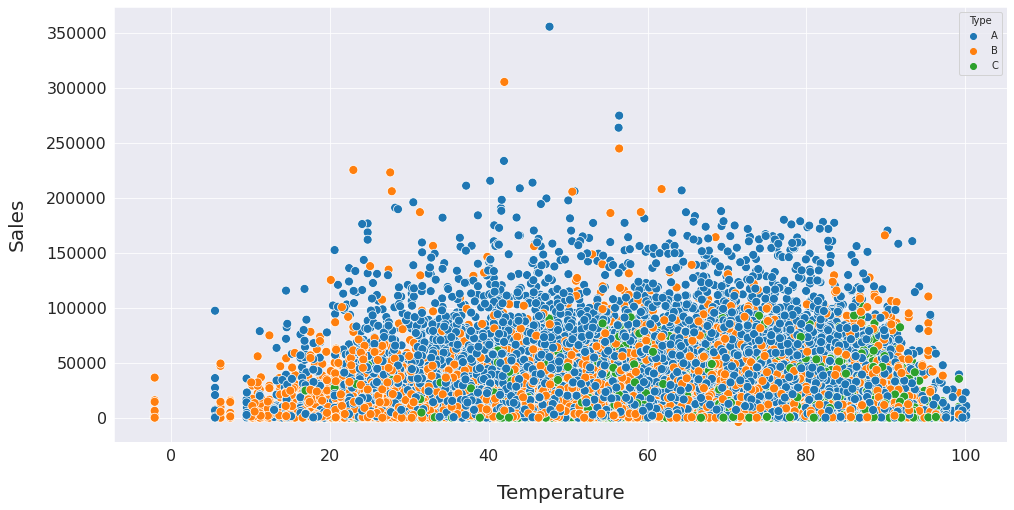

In [ ]:

plt.figure(figsize=(16,8))
sns.scatterplot(x=train_sample_df.Temperature, y=train_sample_df.Weekly_Sales, hue=train_sample_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);


There seems to be no relationship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship

Rel: Fuel_price Vs Sales

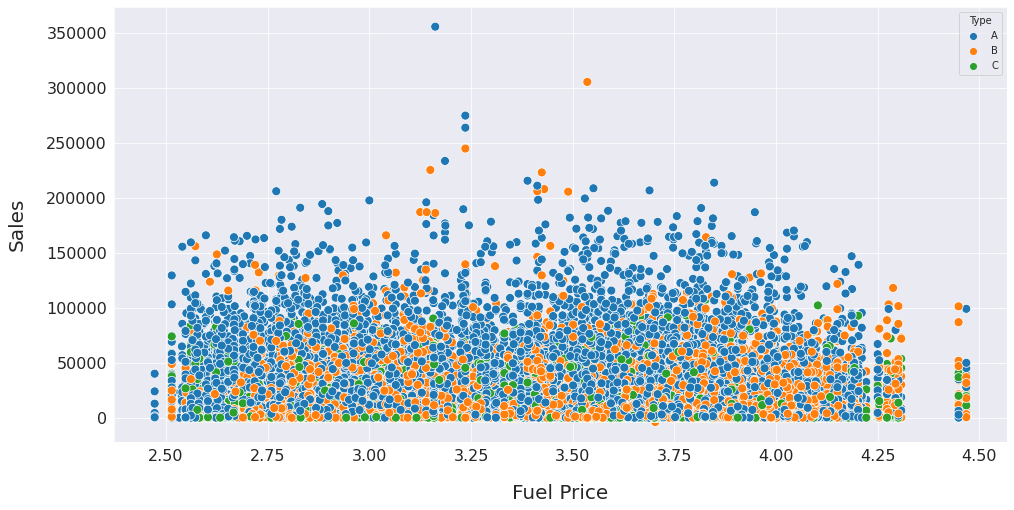

In [ ]:

plt.figure(figsize=(16,8))
sns.scatterplot(x=train_sample_df.Fuel_Price, y=train_sample_df.Weekly_Sales, hue=train_sample_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Between fuel price and the sales there doesn't seem to exist any clear relationship



Rel: CPI Vs Sales

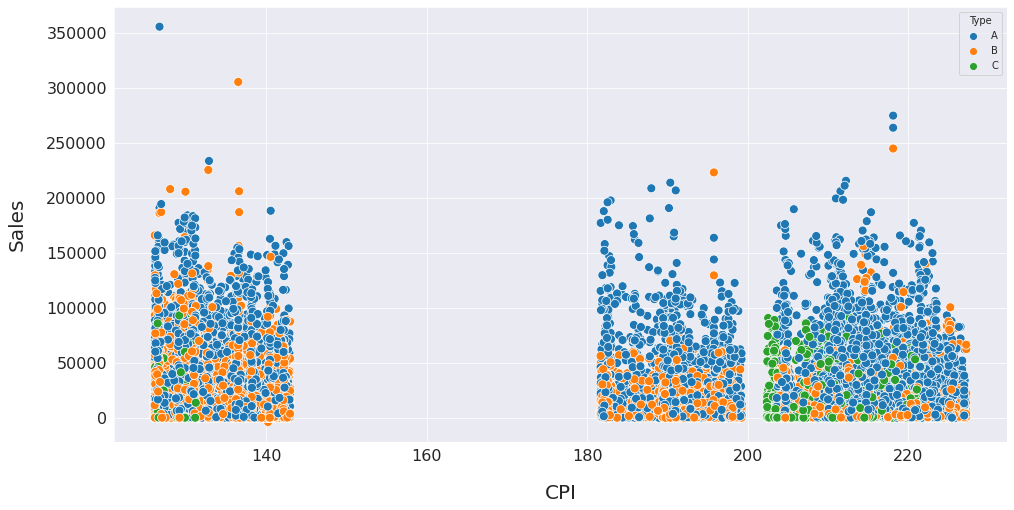

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=train_sample_df.CPI, y=train_sample_df.Weekly_Sales, hue=train_sample_df.Type, s=80);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

There are 3 clear clusters but there doesn't exist any clear correlation between CPI and weekly sales



**Coorelation Matrix **

Lets study the relationship between the different columns numerically to check how they correlate with the weekly sales in order to confirm the inferences we have gathered from the above EDA study. Since the correlation value can only be calculated for the numerical columns, so we will first convert the 'Type' column to numerical values. Type 'A', 'B' and 'C' will be mapped to 1, 2 and 3 respectively


In [ ]:
storetype_values = {'A':3, 'B':2, 'C':1}
train_sample_df['Type_Numeric'] = train_sample_df.Type.map(storetype_values)
train_sample_df['Type_Numeric'] = train_sample_df.Type.map(storetype_values)

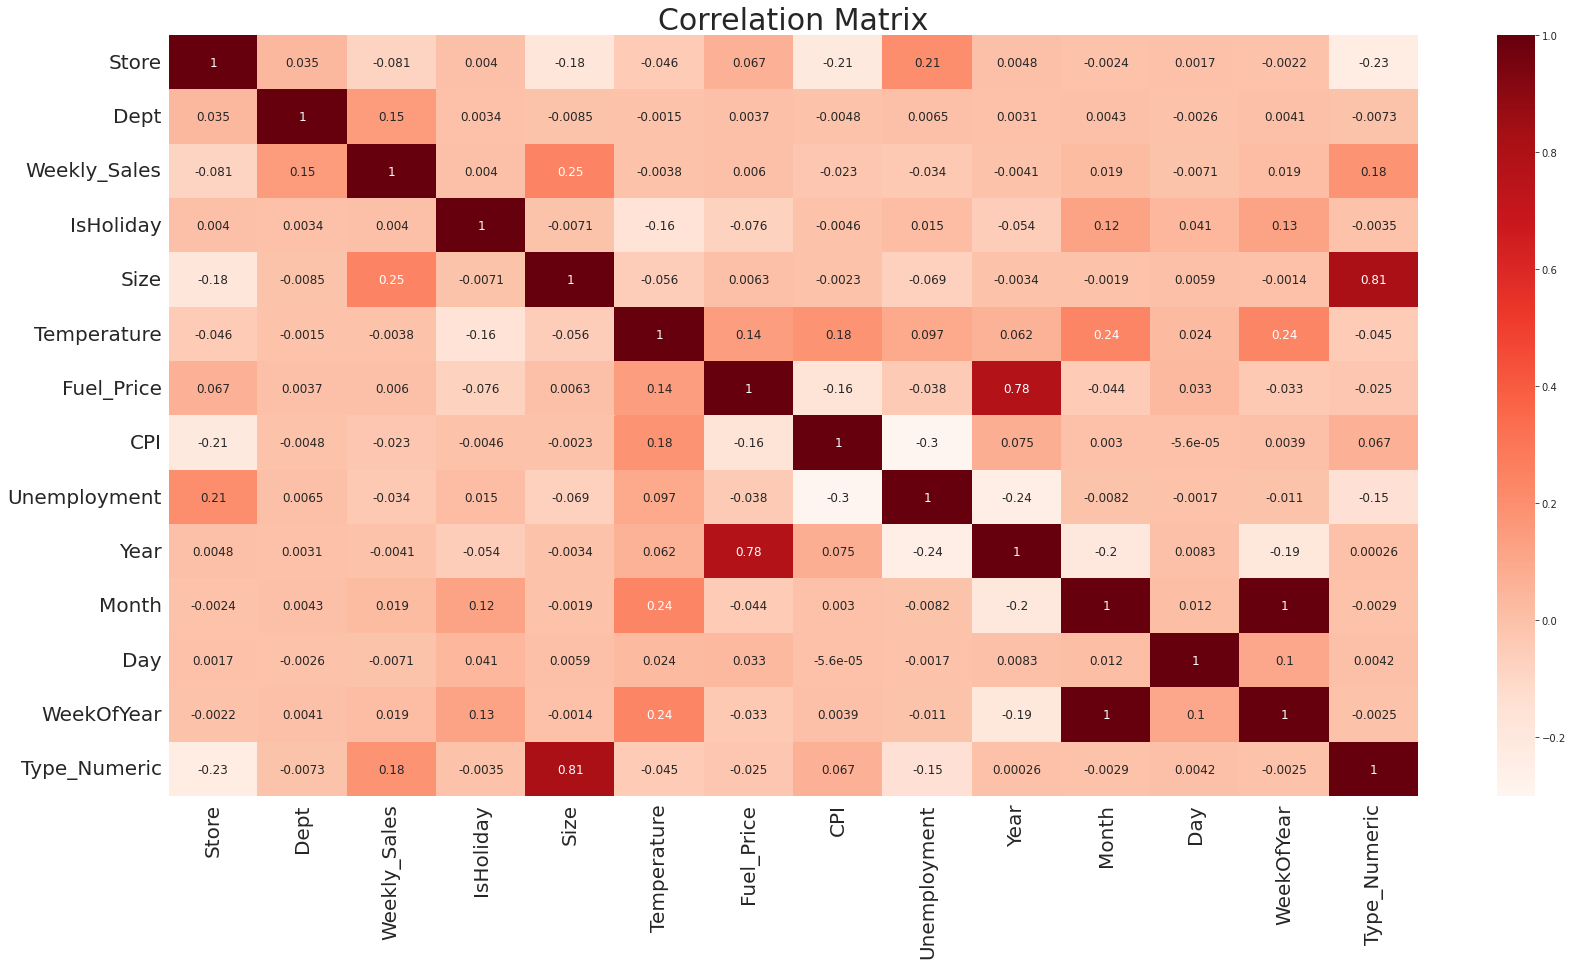

In [ ]:

plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(train_sample_df.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

- Department, Store size and Type have moderate correlation with the weekly sales

- IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks1. 

- We will also leave out Month and Day as this information is already contained in the WeekOfYear

### Input and Target Columns


In [ ]:
train_sample_df.columns


Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month',
       'Day', 'WeekOfYear'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
target_col = 'Weekly_Sales'

In [ ]:
inputs = train_sample_df[input_cols].copy()
targets = train_sample_df[target_col].copy()

In [ ]:
test_inputs = test_store_df[input_cols].copy()

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [ ]:
numeric_cols = ['Store', 'Dept', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day',
       'WeekOfYear']
categorical_cols = ['IsHoliday', 'Type']

In [ ]:
inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

In [ ]:
test_inputs[numeric_cols].isna().sum()

Store               0
Dept                0
Size                0
Temperature         0
Fuel_Price          0
CPI             16577
Unemployment    16577
Year                0
Month               0
Day                 0
WeekOfYear          0
dtype: int64

In [ ]:
mean_CPI = inputs.CPI.mean()
mean_Unemployment = inputs.Unemployment.mean()

In [ ]:
inputs['CPI'].fillna(mean_CPI, inplace=True)
inputs['Unemployment'].fillna(mean_Unemployment, inplace=True)
test_inputs['CPI'].fillna(mean_CPI, inplace=True)
test_inputs['Unemployment'].fillna(mean_Unemployment, inplace=True)

In [ ]:
test_inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

In [ ]:
inputs[numeric_cols].isna().sum()

Store           0
Dept            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
WeekOfYear      0
dtype: int64

###Scaling Numeric Features


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

### Encode Categorical Columns

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

Let's one-hot encode categorical columns.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoder1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(test_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols1 = list(encoder1.get_feature_names_out(categorical_cols))

In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols1] = encoder1.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.



In [ ]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols1]


## Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

Here's a visual representation of gradient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)



**Training**

To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using model.fit.



In [ ]:
%%time
model.fit(X, targets)

[12:15:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.45 s, sys: 47.5 ms, total: 1.5 s
Wall time: 1.06 s


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

**Prediction**
We can now make predictions and evaluate the model using model.predict.

In [ ]:
preds = model.predict(X)


####Prediction
Let's predict the submission set directly.

In [ ]:
preds1 = model.predict(X_test)


Evaluation

Let's evaluate the predictions using RMSE error.

In [ ]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [ ]:
rmse(preds, targets)


14314.238155461648

Visualization

We can visualize individual trees using plot_tree (note: this requires the graphviz library to be installed).

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

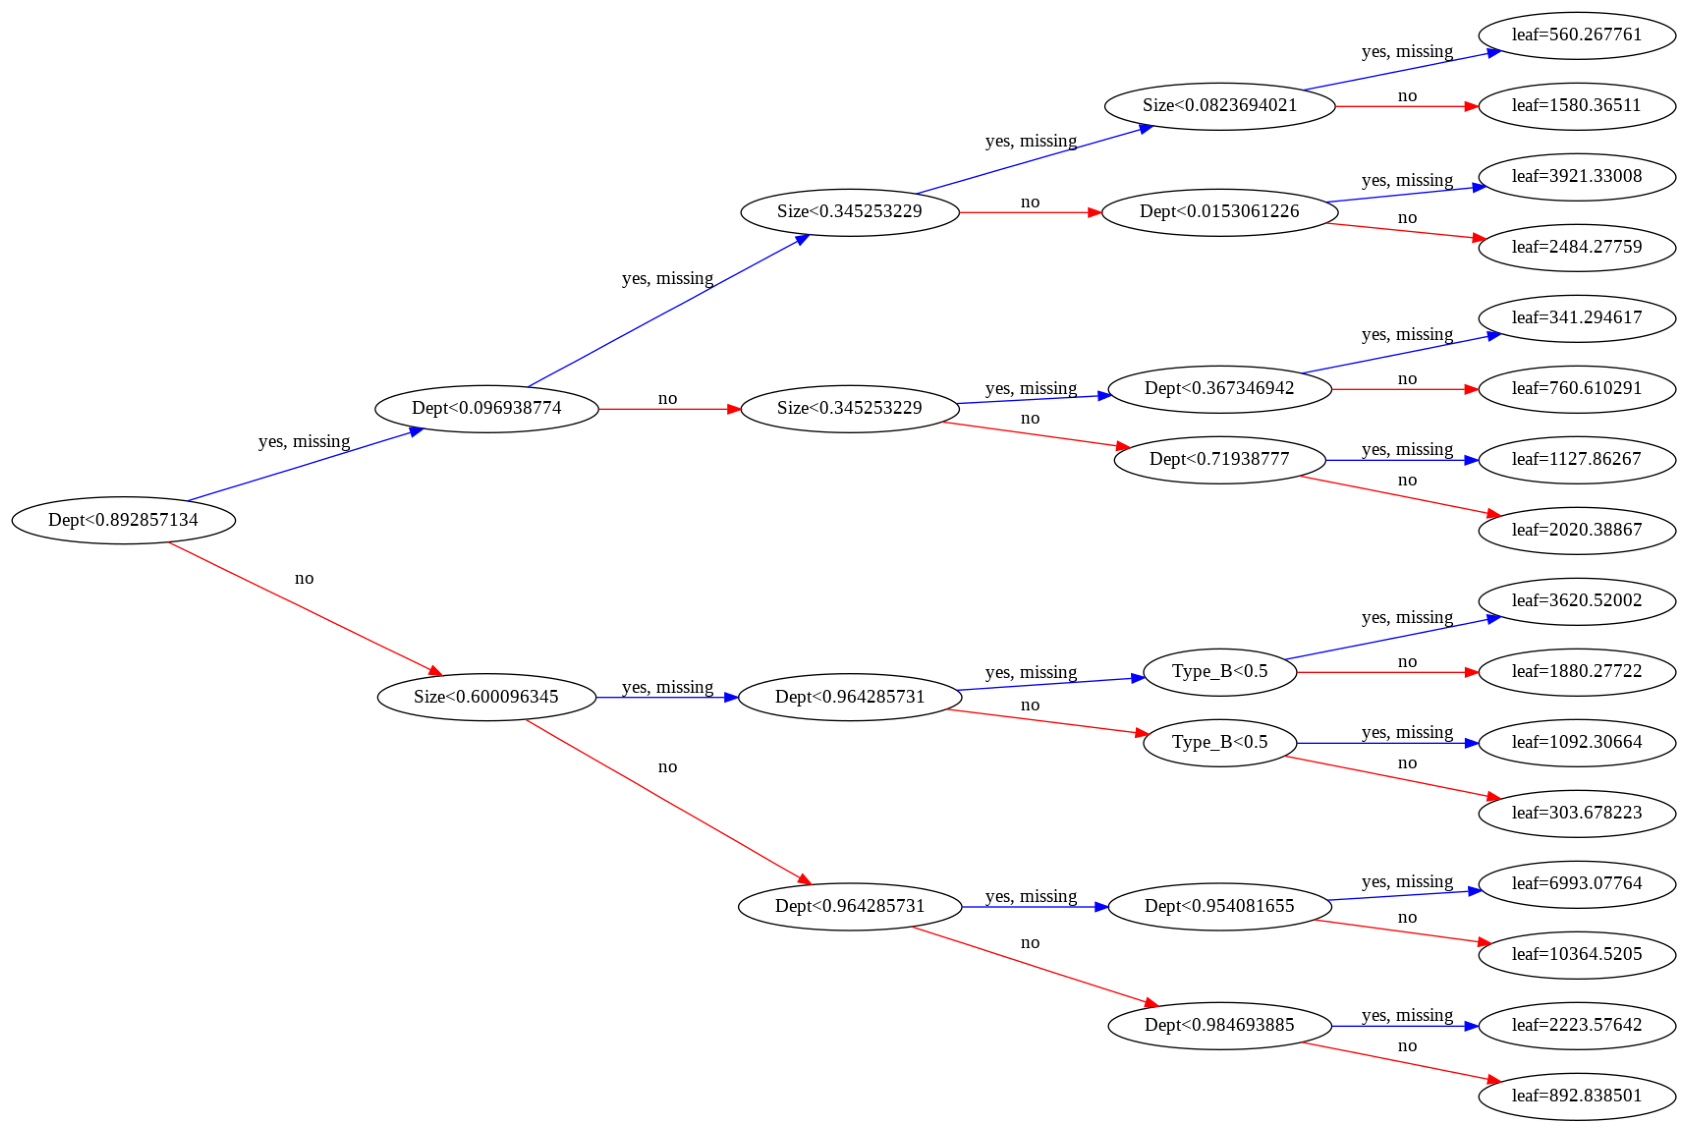

In [ ]:
plot_tree(model, rankdir='LR');

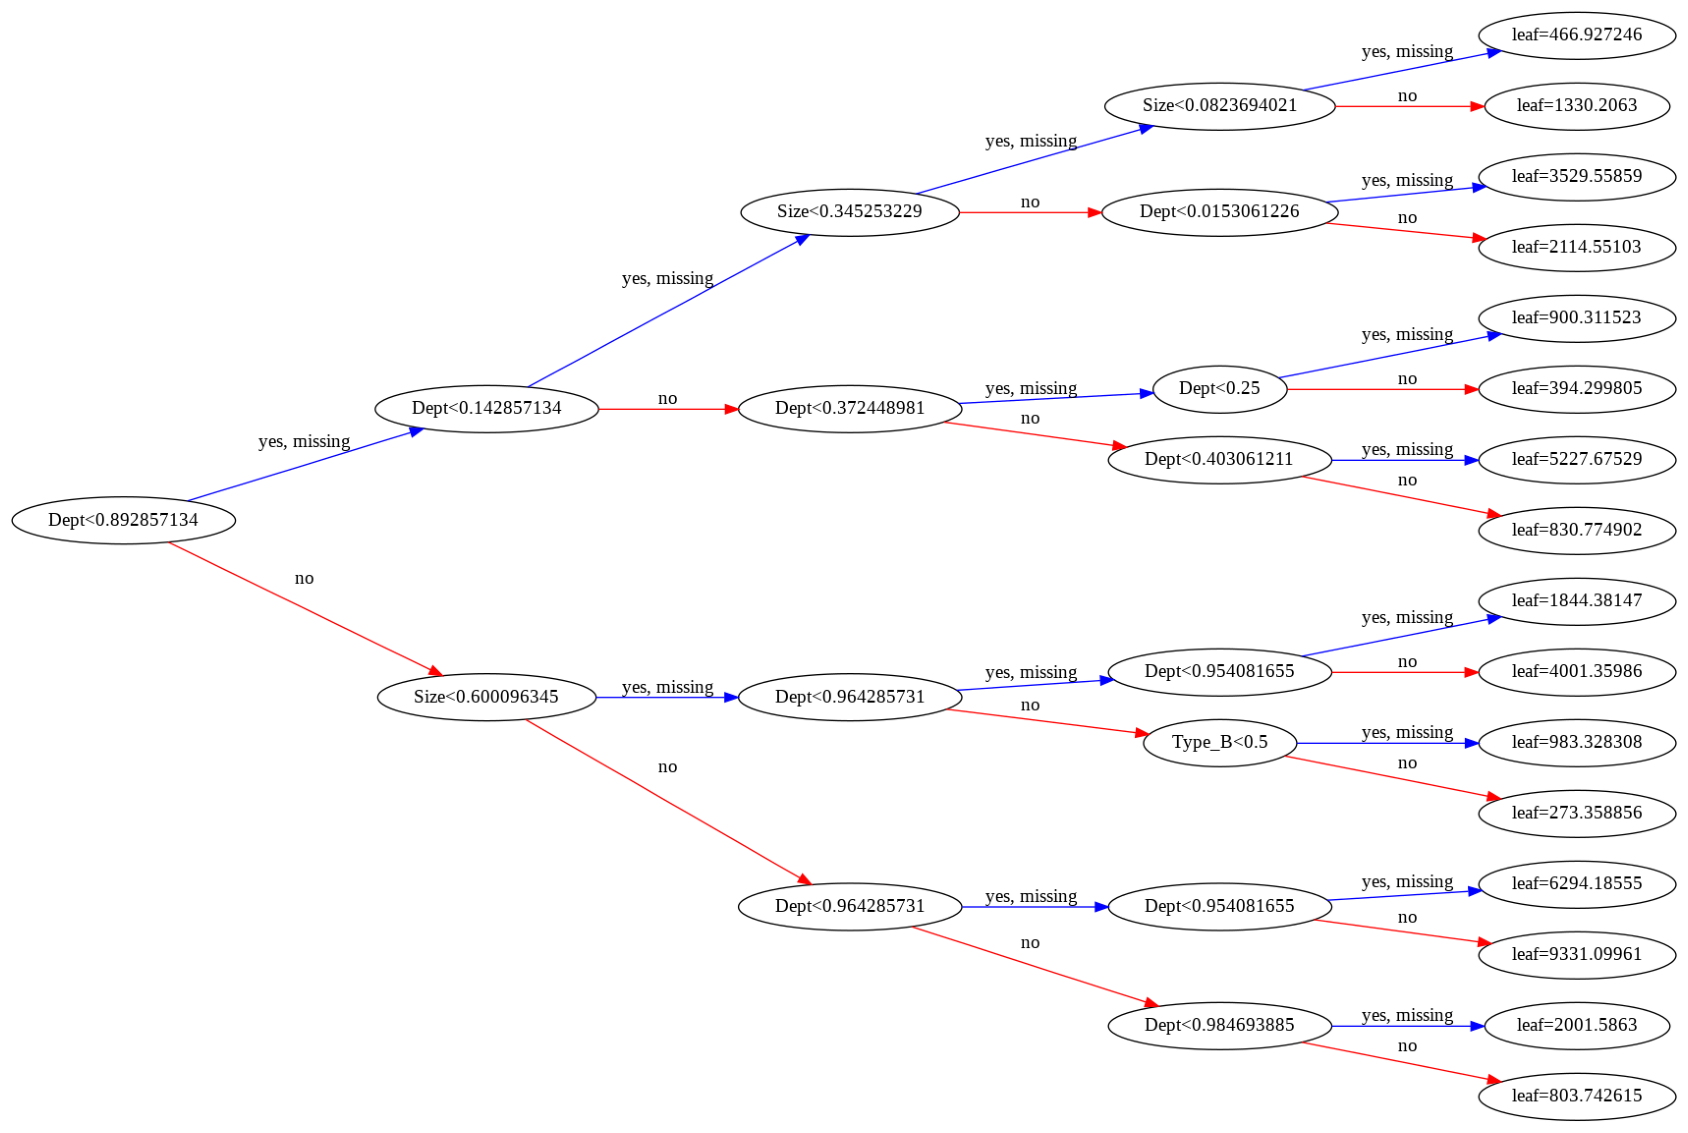

In [ ]:
plot_tree(model, rankdir='LR', num_trees=1);


In [ ]:
trees = model.get_booster().get_dump()

In [ ]:
len(trees)

20

In [ ]:
print(trees[0])

0:[Dept<0.892857134] yes=1,no=2,missing=1
	1:[Dept<0.096938774] yes=3,no=4,missing=3
		3:[Size<0.345253229] yes=7,no=8,missing=7
			7:[Size<0.0823694021] yes=15,no=16,missing=15
				15:leaf=560.267761
				16:leaf=1580.36511
			8:[Dept<0.0153061226] yes=17,no=18,missing=17
				17:leaf=3921.33008
				18:leaf=2484.27759
		4:[Size<0.345253229] yes=9,no=10,missing=9
			9:[Dept<0.367346942] yes=19,no=20,missing=19
				19:leaf=341.294617
				20:leaf=760.610291
			10:[Dept<0.71938777] yes=21,no=22,missing=21
				21:leaf=1127.86267
				22:leaf=2020.38867
	2:[Size<0.600096345] yes=5,no=6,missing=5
		5:[Dept<0.964285731] yes=11,no=12,missing=11
			11:[Type_B<0.5] yes=23,no=24,missing=23
				23:leaf=3620.52002
				24:leaf=1880.27722
			12:[Type_B<0.5] yes=25,no=26,missing=25
				25:leaf=1092.30664
				26:leaf=303.678223
		6:[Dept<0.964285731] yes=13,no=14,missing=13
			13:[Dept<0.954081655] yes=27,no=28,missing=27
				27:leaf=6993.07764
				28:leaf=10364.5205
			14:[Dept<0.984693885] yes=29,no=30,

**Feature importance**

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

feature  importance
2           Size    0.353708
1           Dept    0.298798
5            CPI    0.088997
0          Store    0.070894
15        Type_C    0.068783
14        Type_B    0.061382
6   Unemployment    0.040792
10    WeekOfYear    0.013520
13        Type_A    0.003126
3    Temperature    0.000000

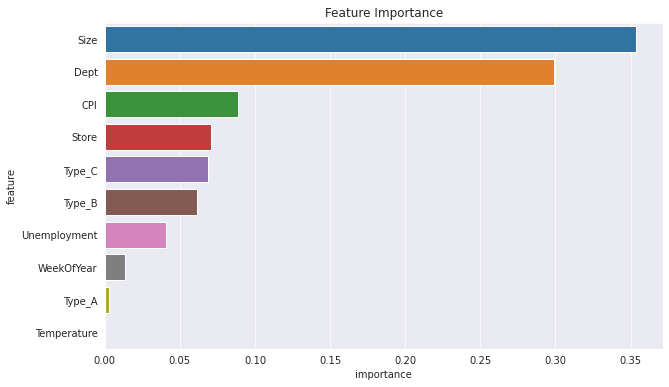

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

In [ ]:
from sklearn.model_selection import KFold


Scikit-learn provides utilities for performing K fold cross validation.

Let's define a helper function train_and_evaluate which trains a model the given parameters and returns the trained model, training error and validation error.

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

Now, we can use the KFold utility to create the different training/validations splits and train a separate model for each fold.

In [ ]:
kfold = KFold(n_splits=5)

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

[13:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14316.611602047056, Validation RMSE: 15488.203242689005
[13:02:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14578.532538989868, Validation RMSE: 14212.019671703578
[13:02:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14084.4558030465, Validation RMSE: 14180.319655539464
[13:02:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14363.056463586177, Validation RMSE: 13976.038710040993
[13:02:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14370.125047141237, Validation RMSE: 14107.915919321973


Let's also define a function to average predictions from the 5 different models.

In [ ]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [ ]:
preds = predict_avg(models, X)

## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Check out the following resources to learn more about hyperparameter supported by XGBoost:

- https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
- https://xgboost.readthedocs.io/en/latest/parameter.html

In [ ]:
model

XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

Here's a helper function to test hyperparameters with K-fold cross validation.



### Evaluation

Let's evaluate the predictions using RMSE error.

In [ ]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [ ]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


**n_estimators**

The number of trees to be created. More trees = greater capacity of the model.

In [ ]:
test_params(n_estimators=10)

[13:04:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 18729.561210463347, Validation RMSE: 17651.454239601884


In [ ]:
test_params(n_estimators=100)

[13:05:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 11284.484176163154, Validation RMSE: 10892.46461784228


In [ ]:
test_params(n_estimators=500)

[13:05:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 8315.396099440924, Validation RMSE: 8400.863708436804


**Max_depth**

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
test_params(max_depth=2)

[13:05:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 14115.27013928919, Validation RMSE: 13441.825469660078


In [ ]:
test_params(max_depth=15)

[13:05:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 383.6607740908724, Validation RMSE: 4511.425491466526


**Learning_rate**

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [ ]:
test_params(n_estimators=50, learning_rate=0.01)

[13:06:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 21952.583914784896, Validation RMSE: 20744.37632960785


In [ ]:
test_params(n_estimators=500, learning_rate=0.9)

[13:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 6062.461244370253, Validation RMSE: 7049.595015763659


In [ ]:
test_params(n_estimators=500, learning_rate=0.9, max_depth=15)

[13:06:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 0.0011892387843694219, Validation RMSE: 5852.6934997826565


**Booster**

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using booster.

In [ ]:
test_params(booster='gblinear')

[13:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train RMSE: 22329.703022112473, Validation RMSE: 21028.45247967734


####Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters.

In [ ]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [ ]:
%%time
model.fit(X, targets)

[13:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 2min 47s, sys: 305 ms, total: 2min 48s
Wall time: 1min 37s


XGBRegressor(colsample_bytree=0.7, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, random_state=42, subsample=0.9)

Now that the model is trained, we can make predictions on the test set.



In [ ]:
test_preds = model.predict(X_test)


In [ ]:
rmse(test_preds, targets)

31438.740067013467

In [ ]:
rmse(preds, targets)

14323.96405267828

We tested final regult with XGBRegressor without any useful parameters and with parameters

Creating Submitting file

In [ ]:
Submission

Id  Weekly_Sales
0         1_1_2012-11-02             0
1         1_1_2012-11-09             0
2         1_1_2012-11-16             0
3         1_1_2012-11-23             0
4         1_1_2012-11-30             0
...                  ...           ...
115059  45_98_2013-06-28             0
115060  45_98_2013-07-05             0
115061  45_98_2013-07-12             0
115062  45_98_2013-07-19             0
115063  45_98_2013-07-26             0

[115064 rows x 2 columns]

In [ ]:
Submission_sample=Submission.sample(n = 50000)
Submission_sample.shape

(50000, 2)

In [ ]:
test_preds.shape

(50000,)

In [ ]:
Submission_sample['Weekly_Sales'] = test_preds
Submission_sample.to_csv('Submission_sample.csv',index=False)

In [ ]:
Submission_sample

Id  Weekly_Sales
20711   8_67_2013-03-08   3482.741943
79126  30_46_2013-07-05   5186.777832
71542  27_44_2012-12-28     -7.904823
4108    2_36_2012-11-23  12696.546875
20587   8_58_2012-12-28   6837.250977
...                 ...           ...
42585  16_87_2013-06-21  23111.355469
16496   7_11_2013-02-15  20894.996094
96614   38_7_2013-05-10  41409.351562
6043    3_12_2013-06-28  27820.746094
61265  23_80_2013-05-24  44606.605469

[50000 rows x 2 columns]

## Summary and References

